In [1]:
import cv2

In [2]:
def read_img(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, gray

In [3]:
img1 = read_img('진아1.jpg')[0]
img2 = read_img('진아2.jpg')[0]

In [4]:
# import sys
# sys.path.append('/opt/ml/project/final-project-level3-cv-12_2/yolov5')

# from modules.Human_detect import Human_detect
from modules.changeDetector import detectChange
from modules.ramen_detect import ramen_detect
from modules.classification import Classifier
from modules.outDetection import outDetector


In [5]:
change_bboxes = detectChange(img1, img2)
#1.
bbox_ramen1 = ramen_detect(img1)
bbox_ramen2 = ramen_detect(img2)

#2.
# bbox_ramen1 = ramen_detect(img1[change_bboxes])
# bbox_ramen2 = ramen_detect(img2[change_bboxes])

classifier = Classifier()
label_names1 = classifier.get_label(img1, bbox_ramen1)
label_names2 = classifier.get_label(img2, bbox_ramen2)

outdetector = outDetector()
is_out = outdetector.predict(img1, bbox_ramen1)



Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs
Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [6]:
width = 1440
height = 1440

before_bboxes = []

for bbox in bbox_ramen1:
    [cls, xc, yc, w, h, conf] = bbox
    x = xc - w/2
    y = yc - h/2
    x *= width
    w *= width
    y *= height
    h *= height
    before_bboxes.append([int(x), int(y), int(w), int(h)])

ValueError: not enough values to unpack (expected 6, got 4)

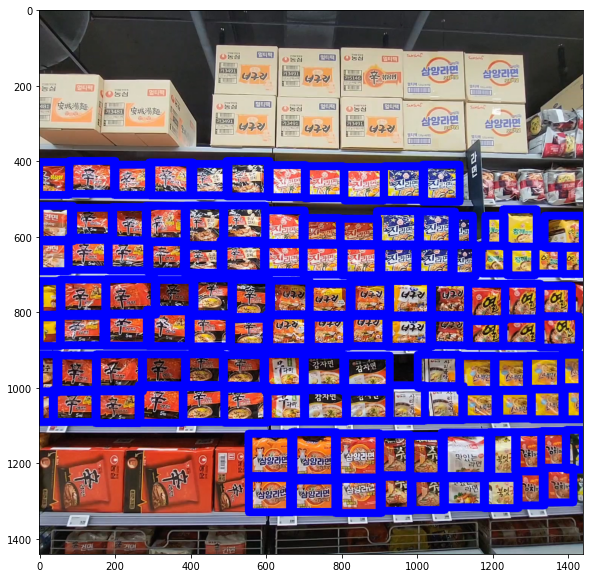

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

for before_bbox in before_bboxes:
    x, y, w, h = before_bbox
    ret = cv2.rectangle(img1, (x,y), (x+w, y+h), (0, 0, 255), 20)

plt.figure(figsize=(12, 10))
plt.imshow(ret)
plt.show()